### Importing packages

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Loading velocity data stored in a Netcdf file using xarray

In [3]:

ds = xr.open_dataset("data/uv_data.nc").squeeze()
ds
# calculating magnitude of velocity
rv = (ds.uo**2 + ds.vo**2) ** 0.5

In [5]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 2041, longitude: 4320)
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
    time       datetime64[ns] 2023-04-25T12:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    vo         (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    uo         (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/13)
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    title:             daily mean fields from Global Ocean Physics Analysis a...
    area:              Global
    Conventions:       CF-1.8
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    ...                ...
    source:            MOI GLO12
    licence:           http://marine.copernicus.eu/services-portfolio/service...
    institution:       Mercator Ocean International
    _CoordSysBuilder:  ucar.nc2.dataset.conv.CF1Convention
    comment:           
    history:           Data extracted from dataset http://localhost:8080/thre...

### upper ocean circulation

Text(0.5, 1.0, '')

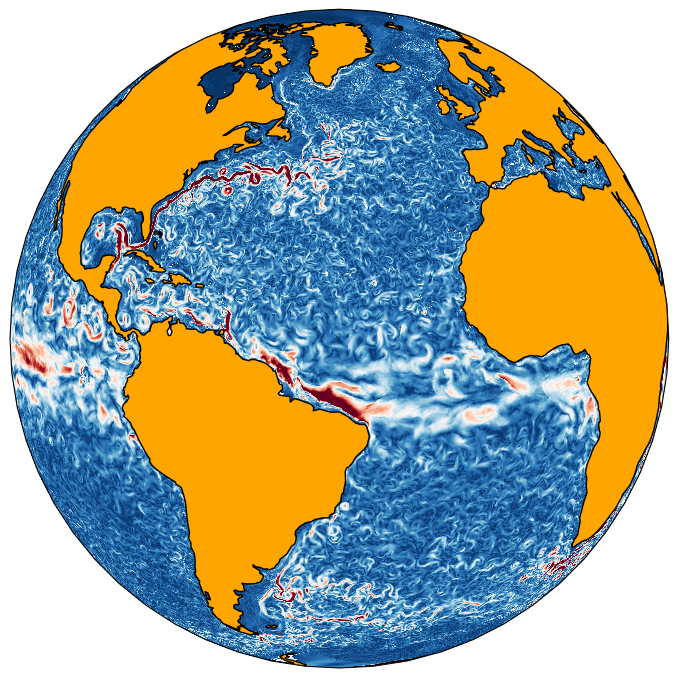

In [6]:
fig = plt.figure(figsize=(8.5, 10))
gs = fig.add_gridspec(1, 1)


# using orthographic projection
projection = ccrs.Orthographic(
    central_longitude=-40,
    central_latitude=10,
)


ax = fig.add_subplot(gs[0, 0], projection=projection)
ax.add_feature(cfeature.LAND, facecolor="orange", zorder=15, edgecolor="k")
ax.set_global()

cb = rv.plot.pcolormesh(
    ax=ax,
    vmin=0.0009,
    vmax=1.05,
    cmap="RdBu_r",
    shading="nearest",
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)
ax.set_title("")



